In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot, cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Main dependencies
import torch 
import math
import numpy as np
import scipy.io
import scipy.fftpack

from timeit import default_timer

In [3]:
def fftind(size):
    # Defines the fourier space indices for a given real space size
    k_ind = np.mgrid[:size, :size] - int( (size + 1)/2 )
    k_ind = scipy.fftpack.fftshift(k_ind)
    return( k_ind )


def gaussian_random_field(alpha = 3.0, size = 128,flag_normalize = True):
        
    # Defines momentum indices
    k_idx = fftind(size)

    # Defines the amplitude as a power law 1/|k|^(alpha/2)
    amplitude = np.power( k_idx[0]**2 + k_idx[1]**2 + 1e-10, -alpha/4.0 )
    amplitude[0,0] = 0
    
    # Draws a complex gaussian random noise with normal
    # (circular) distribution
    noise = np.random.normal(size = (size, size)) \
        + 1j * np.random.normal(size = (size, size))
    
    # To real space
    gfield = np.fft.ifft2(noise * amplitude).real
    
    # Sets the standard deviation to one
    if flag_normalize:
        gfield = gfield - np.mean(gfield)
        gfield = gfield / np.std(gfield)
        
    return gfield

(151, 151)
mean:  -9.972092252235957e-18
std:  1.0



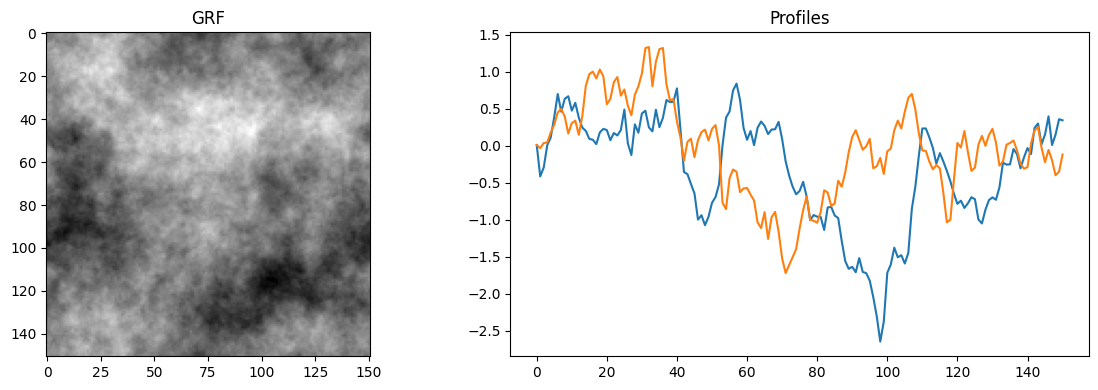

In [4]:
gfield_sample = gaussian_random_field(alpha = 3.0, size = 151)
print(gfield_sample.shape)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(gfield_sample, cmap='gray')
plt.title("GRF")
print('mean: ', np.mean(gfield_sample))
print('std: ', np.std(gfield_sample))
print("")
plt.subplot(122)
plt.plot(gfield_sample[:,0])
plt.plot(gfield_sample[0,:])
plt.title('Profiles')
plt.tight_layout()
plt.show()

Solving 2D Diffusion Convection Equation using Finite Difference Method

dt:  0.000888888888888889
x.shape:  (151,)
y.shape:  (151,)
u.shape:  (151, 151)
un.shape:  (151, 151)
------------------------------------------------
Plotting Innitial Solution: Cuboidic Wave Profile
------------------------------------------------
X.shape:  (151, 151)
Y.shape:  (151, 151)


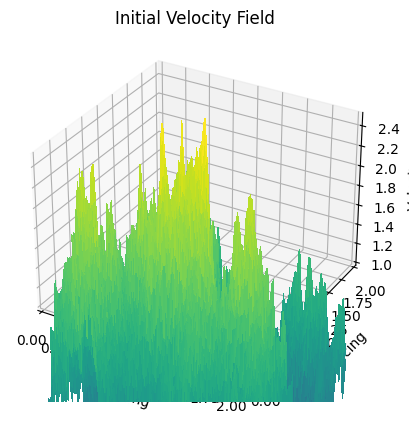

In [5]:
lineSingle = '------------------------------------------------'

print("Solving 2D Diffusion Convection Equation using Finite Difference Method\n")

nx = 151                  #grid points in x-Direction
ny = 151                  #grid points in y-Direction
nu = 0.05                #viscosity

#grid spacing

dx = 2/(nx-1)

dy = 2/(ny-1)

cfl = 0.25
dt =  cfl*dx*dy/nu       #time step based on von neumann stability analysis
print("dt: ",dt)   
nt = 1000000                  #number of time step

x = np.linspace(0, 2, nx)       #array along x
print("x.shape: ",x.shape)
y = np.linspace(0, 2, ny)       #array along y
print("y.shape: ",y.shape)

#2d temporaray array where we copy our velocity field

u = np.ones((ny,nx))
print("u.shape: ",u.shape)
un = np.ones((ny,nx))
print("un.shape: ",un.shape)

#innitial condition
#Cuboidic Wave Profile

u = gfield_sample.copy()
#plotting innitial condition

print(lineSingle)
print("Plotting Innitial Solution: Cuboidic Wave Profile")
print(lineSingle)


fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(x, y)
print("X.shape: ",X.shape)
print("Y.shape: ",Y.shape)
surf = ax.plot_surface(X,Y,u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

ax.set_title('Initial Velocity Field')
ax.set_xlabel('X Spacing')
ax.set_ylabel('Y Spacing')
ax.set_zlabel('Velocity')


ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(1,2.5)

plt.show()

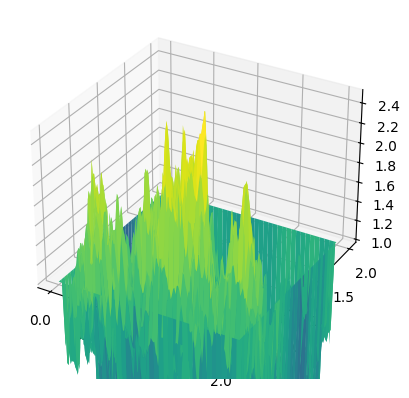

In [6]:
# 초기 그래프 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis, edgecolor='none')
ax.set_zlim(1, 2.5)
ax.set_title('Velocity Field')
ax.set_xlabel('X Spacing')
ax.set_ylabel('Y Spacing')
ax.set_zlabel('Velocity')

# 업데이트 함수
def update(n):
    un = u.copy()
    u[1:-1,1:-1] = (un[1:-1,1:-1] + (nu*dt/dx**2)*(un[2:,1:-1] -2*un[1:-1,1:-1] + un[0:-2,1:-1]) + (nu*dt/dy**2)*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2]))
    u[0,:]  = 1
    u[-1,:] = 1
    u[:,0]  = 1
    u[:,-1] = 1
    ax.clear()
    ax.plot_surface(X, Y, u, cmap=cm.viridis, edgecolor='none')
    ax.set_zlim(1, 2.5)

# 애니메이션 객체 생성
ani = FuncAnimation(fig, update, frames=1000, repeat=False)